No handles with labels found to put in legend.


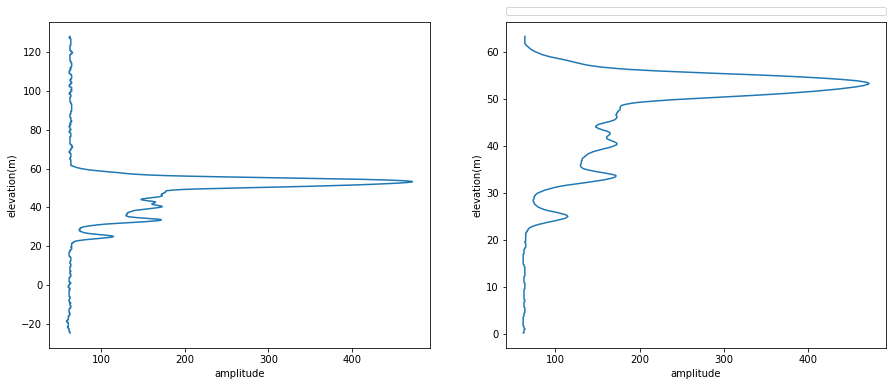

In [1]:
#Libs
import matplotlib.pyplot as plt
import numpy as np
import pylab
import pandas as pd
import h5py
import geopandas as gpd
from shapely.geometry import *
from geopandas.geoseries import *
import sys
from scipy.interpolate import make_interp_spline, BSpline
from scipy import misc
from scipy.ndimage import gaussian_filter

##Import
#L2 is the processed product
L2 =pd.read_csv(r'D:\Gabon_Lidar\DATA\LEVEL2_0308\csv\LVIS2_Gabon2016_0308_R1808_045612.csv')

#L1 is the waveform product- the 'r' is for reading
lvis = h5py.File(r'D:\Gabon_Lidar\DATA\LEVEL1_0308\LVIS1B_Gabon2016_0308_R1808_045612.h5','r')


#Reading get wave index from shotnumber and test if exists
all_shotnums = np.array(lvis['SHOTNUMBER'])
wave_idx = ''
Zmax = ''
wfrange = 1024
wfsize = 1023


#With it read in next part is to read on of the shots - THis is where the loop needs to be.
myshotnum = int(9421462)

#The bumps the selected shot again the shot list
wave_idx = np.where(all_shotnums==myshotnum)[0][0]

#extract the single waveform and elevation attributes Z0 and Z1023;
waveform = lvis['RXWAVE'][wave_idx]

#This extracting the Z0
Z0 = int(lvis['Z0'][wave_idx])

#This extracting the Z1023
Z1023 = int(lvis['Z1023'][wave_idx])

#Check if this does anything
x = Z0 - Z1023

#This brings in the L2 Product
L2 = L2[(L2['SHOTNUMBER'] == myshotnum)]

#find the elevation difference from Z0 to Z1023 and divide into 1023 equal intervals
zstretch = np.add(Z1023,np.multiply(range(wfrange,0,-1),((Z0-Z1023)/int(wfsize))))

#Converting fields to Floats
ZG = float(L2['ZG'])
ZT = float(L2['ZT'])
RH25 = float(L2['RH25'])
RH50 = float(L2['RH50'])
RH75 = float(L2['RH75'])
RH10 = float(L2['RH10'])
RH100 = float(L2['RH100'])

#Smooth
waveform = gaussian_filter(waveform, sigma=3)

## Create Elevation Chart

#set the z range limits for plotting the waveform to crop the noise  - This is for croping
zmin=RH10-(ZT-RH10)/6   #sets zmin at 15% below the waveform range defined in RH10-ZT
zmax=ZT+(ZT-RH10)/18   #sets zmax at 5% above the waveform range defined in RH10-ZT

# crop the waveform and elevation arrays to the z range limits
x = zstretch >= zmin  # this returns boolean True/False based on the comparison condition statement
y = zstretch <= zmax
z = (x == y)  # this creates a combined boolean result from the previous two condition statements
waveform_crop = []
zstretch_crop = []
for i in range(0, len(waveform)):
    if z[i] == True:
        waveform_crop.append(waveform[i])
        zstretch_crop.append(zstretch[i])
#Chart 1
fig = plt.figure(figsize=(15, 6))
figplot = fig.add_subplot(121)
figplot.plot(waveform,zstretch)
plt.ylabel('elevation(m)')
plt.xlabel('amplitude')

#Chart 2
figplot = fig.add_subplot(122)
figplot.plot(waveform_crop,zstretch_crop)
#figplot.hlines(ZT,min(waveform),max(waveform),lw=1,linestyle='-', color='b',label='ZT')
#figplot.hlines(RH75,min(waveform),max(waveform),lw=1,linestyle='-', color='g',label='RH75')
#figplot.hlines(RH50,min(waveform),max(waveform),lw=1,linestyle='-', color='y',label='RH50')
#figplot.hlines(RH25,min(waveform),max(waveform),lw=1,linestyle='-', color='orange',label='RH25')
#figplot.hlines(RH100,min(waveform),max(waveform),lw=1,linestyle='-', color='purple',label='RH100')
#figplot.hlines(ZG,min(waveform),max(waveform),lw=1,linestyle='-', color='r',label='ZG')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=5, mode="expand", borderaxespad=0.)
plt.ylabel('elevation(m)')
plt.xlabel('amplitude')
plt.show(block=False)

